In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# df = pd.read_csv("Output.csv", sep='\t', error_bad_lines= False, nrows=1000) # testing for purpose only
df = pd.read_csv("Output.csv", sep='\t', error_bad_lines= False)
df.shape

(346355, 10)

In [3]:
df['review_class'] = [1 if x > 3 else 0 for x in df.overall]
df.head(2)

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,review_class
0,0,159985130X,"[1, 1]",5.0,This is a great little gadget to have around. ...,"01 5, 2011",ALC5GH8CAMAI7,AnnN,Handy little gadget,1294185600,1
1,1,159985130X,"[1, 1]",4.0,I would recommend this for a travel magnifier ...,"02 18, 2012",AHKSURW85PJUE,"AZ buyer ""AZ buyer""",Small & may need to encourage battery,1329523200,1


In [4]:
x_train, x_test, y_train, y_test = train_test_split(df.reviewText, df.review_class, test_size=0.3, random_state=0)
 
print("x_train shape: {}".format(x_train.shape), end='\n')
print("y_train shape: {}".format(y_train.shape), end='\n\n')
print("x_test shape: {}".format(x_test.shape), end='\n')
print("y_test shape: {}".format(y_test.shape), end='\n\n')


# Convert a collection of raw documents to a matrix
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')
# Learn vocabulary and idf from training set.
vectorizer.fit(x_train.values.astype('U'))
# Learn vocabulary and idf, return term-document matrix. 
# Uses the vocabulary and document frequencies (df) learned by fit.
x_train_tv = vectorizer.transform(x_train.values.astype('U'))
x_test_tv = vectorizer.transform(x_test.values.astype('U'))

x_train shape: (242448,)
y_train shape: (242448,)

x_test shape: (103907,)
y_test shape: (103907,)



In [5]:
# training algorithm 

model = LinearSVC() # 0.87
model.fit(x_train_tv,y_train)
# Predict class labels for samples in X.
y_predict = model.predict(x_test_tv)

AUC 0.7460119844633183


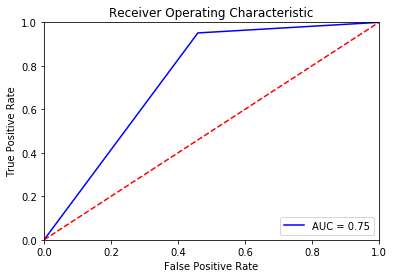

In [6]:
# Accuracy classification score
cv_score = accuracy_score(y_test,y_predict)

# AUC report
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.predict(x_test_tv))
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC', roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy score: 0.872684227241668


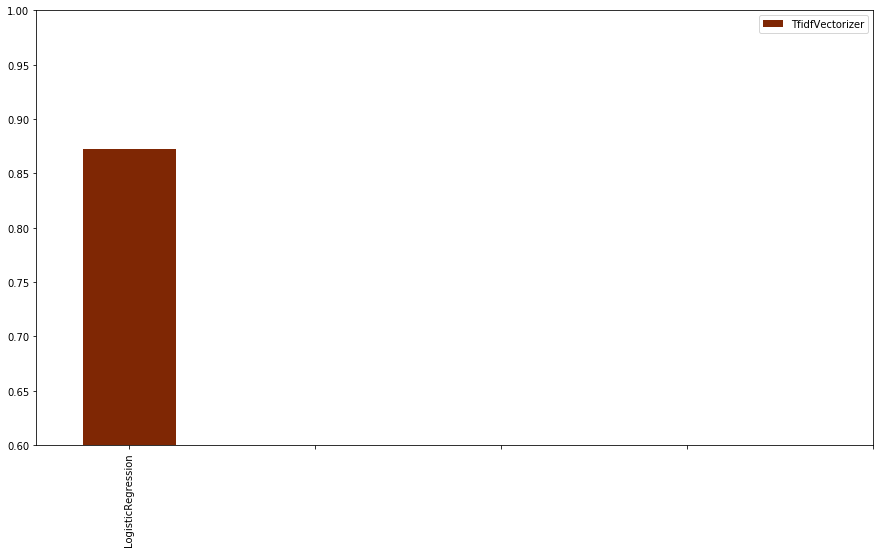

In [7]:
# Plotting the graph
results = {'Model':['LogisticRegression'],
           'TfidfVectorizer':[cv_score]
         }
 
    
results_df = pd.DataFrame(results)
results_df.plot.bar(ylim=(0.60,1.0), figsize=(15,8), align='center', colormap="Oranges_r")
plt.xticks(np.arange(5), results_df.Model)

# printing the out of the score
print('Accuracy score:', cv_score) 

 [[10764  9146]
 [ 4083 79914]]


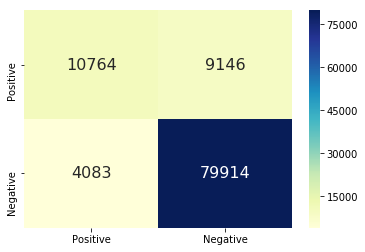

In [8]:
cm = confusion_matrix(y_test, y_predict)
print('',cm)
df_cm = pd.DataFrame(cm, ['Positive', 'Negative'], ['Positive', 'Negative'])
sns.heatmap(df_cm, annot=True, annot_kws={'size':16}, fmt='g', cmap="YlGnBu")

               precision    recall  f1-score   support

           0       0.72      0.54      0.62     19910
           1       0.90      0.95      0.92     83997

   micro avg       0.87      0.87      0.87    103907
   macro avg       0.81      0.75      0.77    103907
weighted avg       0.86      0.87      0.87    103907



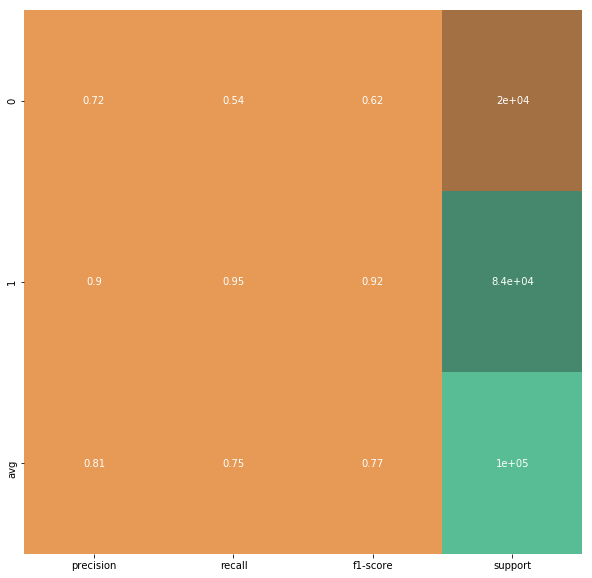

In [9]:
def plot_classification_report(y_tru, y_prd, figsize=(10, 10), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_tru))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax,
               cmap=sns.diverging_palette(760, 153, l=70, n=7, center="dark"))
    
print('', classification_report(y_test, y_predict))
plot_classification_report(y_test, y_predict)
